# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

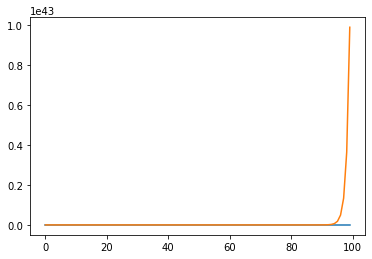

In [43]:
import matplotlib.pyplot as plt

sns.lineplot(x, y)
sns.lineplot(x, z)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

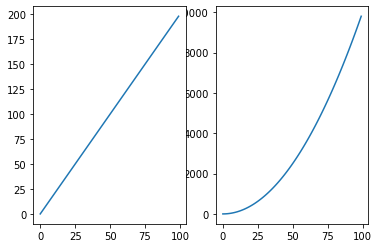

In [33]:
# Method 2
plt.subplot(1, 2,2)
plt.plot(x,z)
plt.subplot(1, 2,1)
plt.plot(x,y)
plt.show()


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

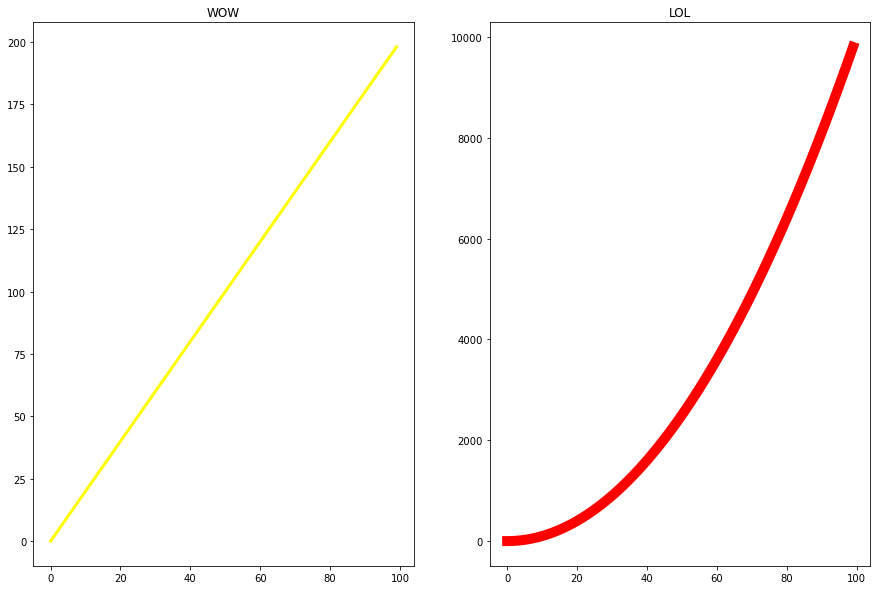

In [46]:
# your code here
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax1.plot(x,y, color='yellow', linewidth=3)
ax1.set_title('WOW')   
ax2.plot(x,z, color='red', linewidth=10)
ax2.set_title('LOL')   
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

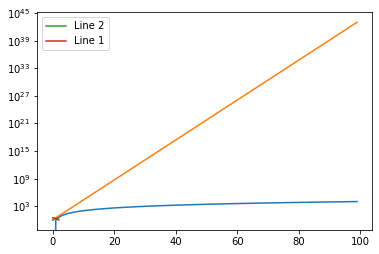

In [9]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.exp(x)

plt.plot(x, y, x, z)
plt.yscale("log")

line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend(handles=[line_up, line_down])
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [10]:
# your code here
import pandas as pd

In [73]:
df = pd.read_csv (r'Fitbit2.csv')
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

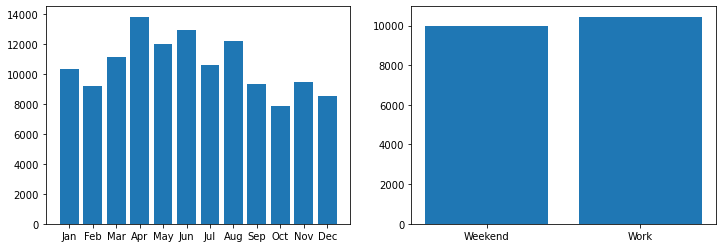

In [78]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1 ,2 , figsize = (12,4))
month_steps = df[['Steps','Months_encoded']].groupby('Months_encoded').median()
ax[0].bar(month_steps.index,month_steps['Steps'],tick_label=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
work_we_steps = df[['Steps','Work_or_Weekend']].groupby('Work_or_Weekend').median()
ax[1].bar(work_we_steps.index,work_we_steps['Steps'],tick_label=['Weekend','Work'])
fig.savefig('fig1.png', dpi = 300)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

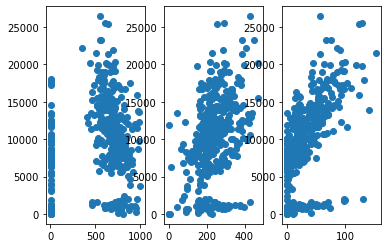

In [83]:
# your code here
plots = ["Minutes Lightly Active" , "Minutes Very Active" , "Minutes Sedentary"]
fig , ax = plt.subplots(1,3)
total = 0
for columns in df:
    if columns in plots:
        ax[total]. scatter(df[columns], df["Steps"])
        total += 1
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [102]:
# your code here
titanic = pd.read_csv (r'titanic.csv')
titanic.head()

titanic["Gender"] = titanic["Gender"].astype('category')
titanic["Survived"] = titanic["Survived"].astype('category')
titanic["Embarked"] = titanic["Embarked"].astype('category')

#### Explore the titanic dataset using Pandas dtypes.

In [103]:
# your code here
titanic.dtypes

PassengerId       int64
Survived       category
Pclass            int64
Name             object
Gender         category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [104]:
# NUMERICAL VARIABLES
# your code here
tit_num = titanic.select_dtypes(include='number')

In [105]:
# CATEGORICAL VARIABLES
# your code here
tit_cat = titanic.select_dtypes(include='category')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [107]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

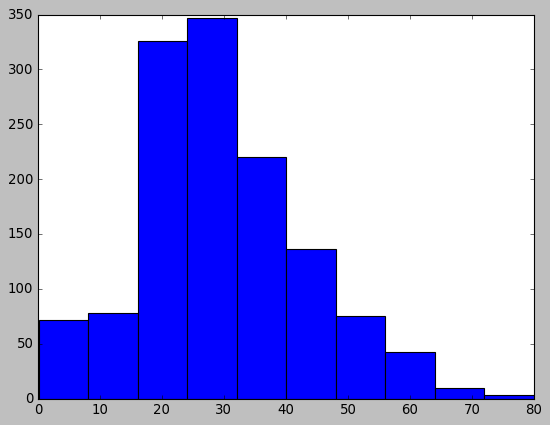

In [114]:
# your code here
plt.hist(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

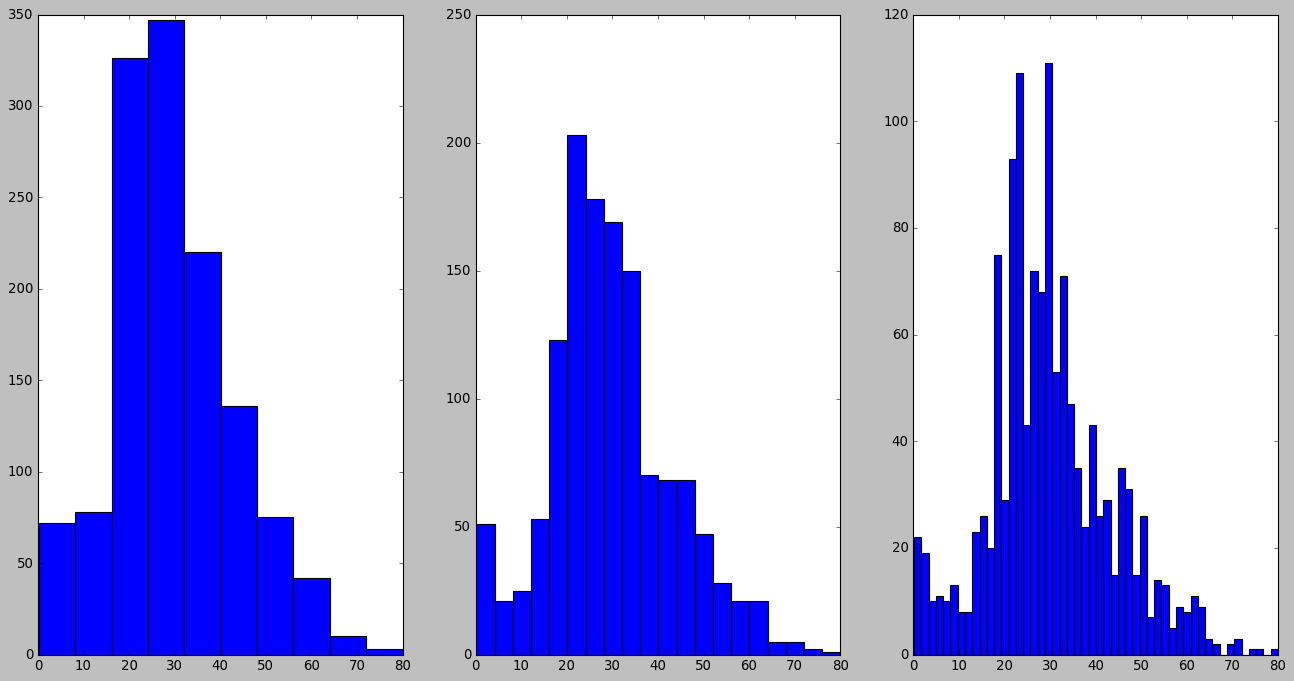

In [113]:
# your code here
bins = [10,20,50]
fig, ax = plt.subplots(1, len(bins),figsize=(20,10))

for i in range(0,len(bins)):
    ax[i].hist(titanic['Age'], bins=bins[i], histtype ='bar')
plt.style.use('classic')

#### How does the bin size affect your plot?

In [ ]:
"""
The larger the bin sizes, the fewer bins there will be to cover the whole range of data"""

#### Use seaborn to show the distribution of column `Age`.

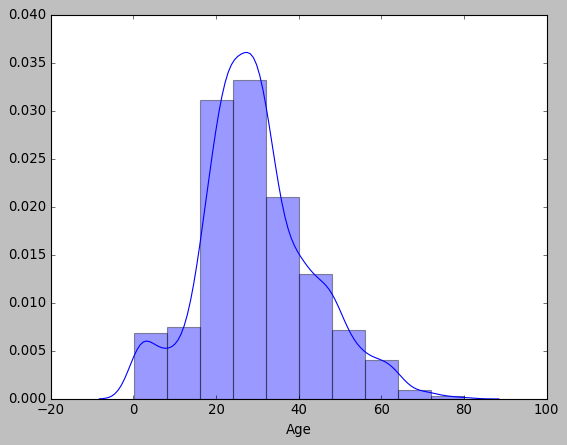

In [115]:
# your code here
fig = sns.distplot(titanic["Age"], kde = True, bins = 10)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

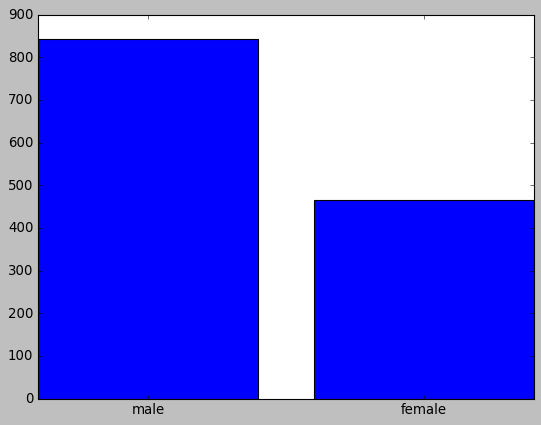

In [129]:
# Method 1 - matplotlib
# your code here
plt.bar(titanic["Gender"].unique(), titanic["Gender"].value_counts())



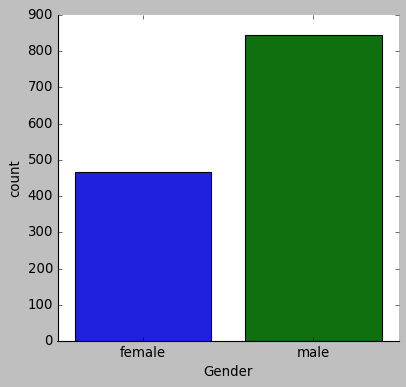

In [133]:
# Method 2 - seaborn
# your code here
sns.catplot(x = 'Gender', kind = 'count', data = titanic)

#### Use the right plot to visualize the column `Pclass`.

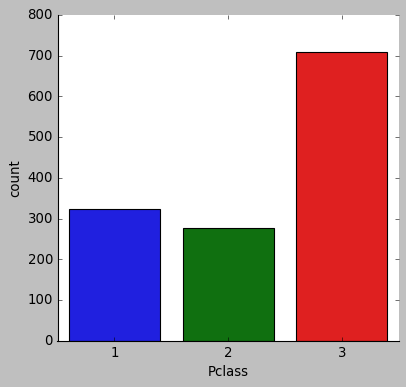

In [134]:
# your code here

sns.catplot(x = 'Pclass', kind = 'count', data = titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

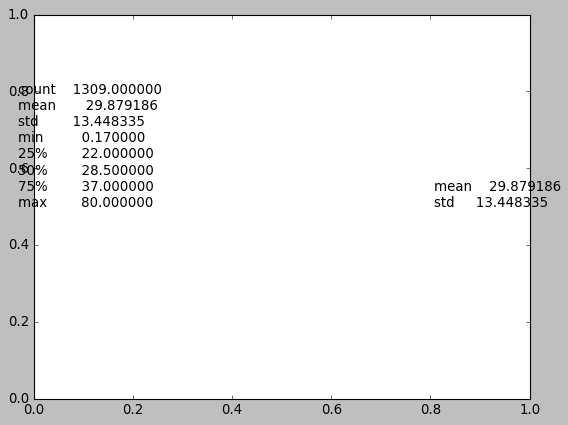

In [138]:
# your code here

fig, ax = plt.subplots()
plt.figtext(0.1,0.5, titanic['Age'].describe().to_string())
plt.figtext(0.75,0.5, titanic['Age'].describe().loc[['mean','std']].to_string())
plt.show()

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
the oldest one is 90, the youngest 0,17 years, the mean is 29 years old
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

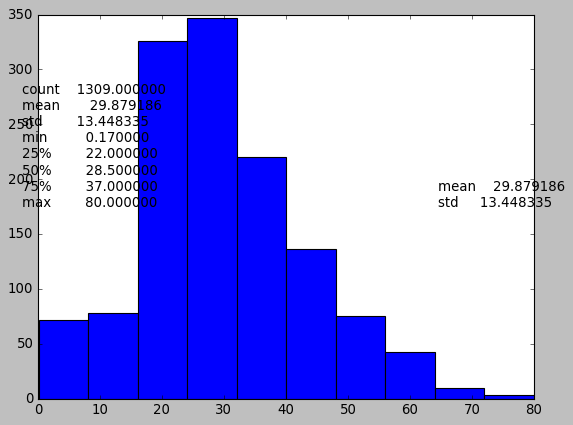

In [139]:
# your code here
fig, ax = plt.subplots()
ax.hist(titanic['Age'])
plt.figtext(0.1,0.5, titanic['Age'].describe().to_string())
plt.figtext(0.75,0.5, titanic['Age'].describe().loc[['mean','std']].to_string())
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

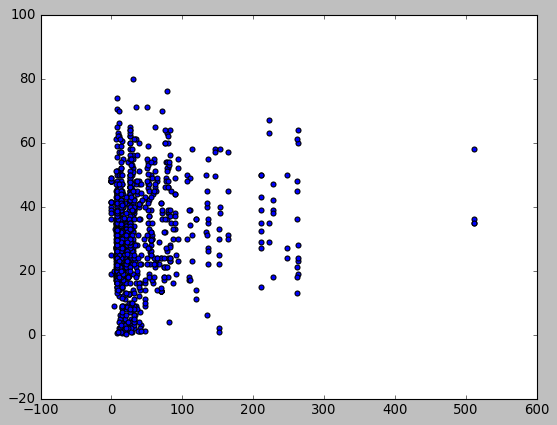

In [146]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic["Fare"], titanic["Age"])
plt.show()

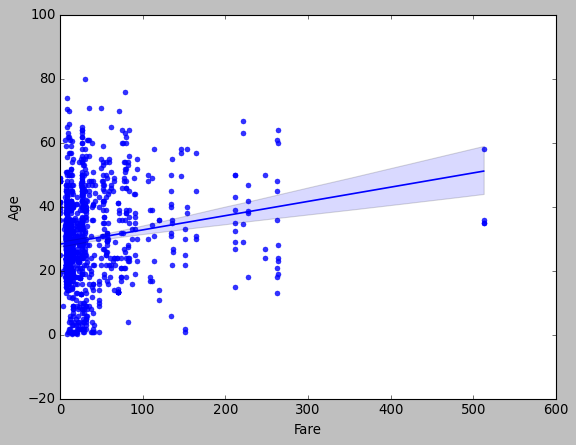

In [144]:
# Method 2 - seaborn
# your code here
sns.regplot(x="Fare", y="Age", data=titanic)


#### Plot the correlation matrix using seaborn.

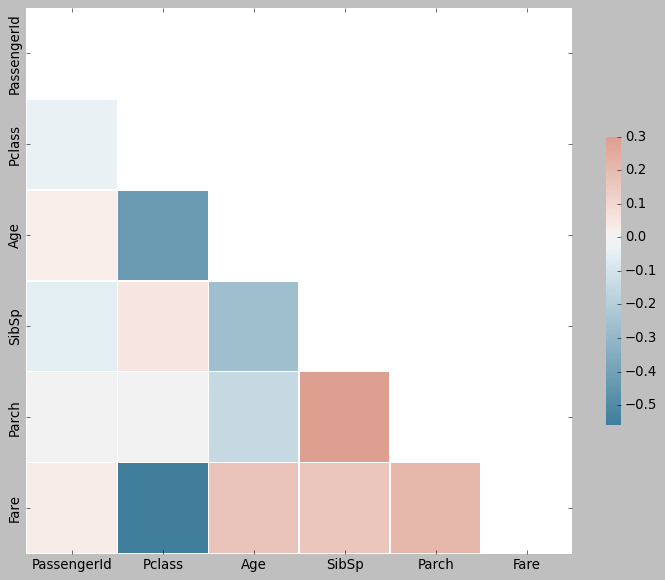

In [148]:
# your code here
corr = titanic.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

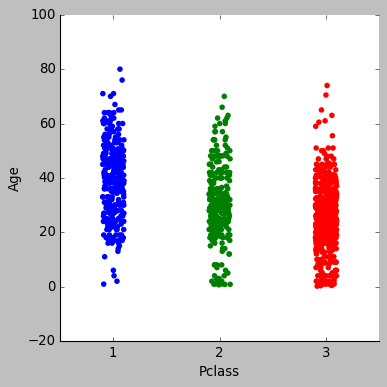

In [152]:
# your code here

sns.catplot(x="Pclass", y="Age", data=titanic, legend=True)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

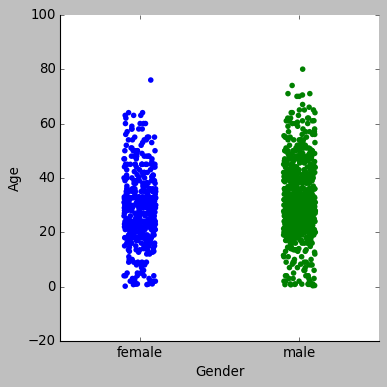

In [153]:
# your code here

sns.catplot(x="Gender", y="Age", data=titanic, legend=True)

AttributeError: module 'seaborn' has no attribute 'histplot'

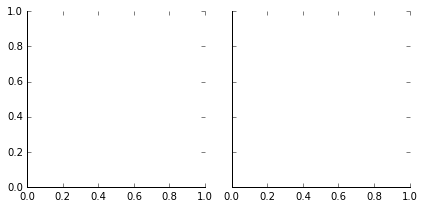

In [170]:
#idk why this one is not working - same code as in the documentation
g = sns.FacetGrid(titanic, col="Gender")
g.map_dataframe(sns.histplot, x="Gender")

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>